In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('spg.csv')

# Handling missing values (if any)
# data = data.dropna() or use other imputation methods

# Separate features and target
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
85/85 [==============================] - 2s 6ms/step - loss: 2121143.2500 - val_loss: 2200220.5000
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 1931805.2500 - val_loss: 1781945.0000
Epoch 3/100
85/85 [==============================] - 0s 3ms/step - loss: 1311643.6250 - val_loss: 965205.8125
Epoch 4/100
85/85 [==============================] - 0s 3ms/step - loss: 669349.3125 - val_loss: 548940.3750
Epoch 5/100
85/85 [==============================] - 0s 3ms/step - loss: 446913.6250 - val_loss: 410941.0938
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 350947.2188 - val_loss: 342446.4062
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 302628.5625 - val_loss: 308718.5625
Epoch 8/100
85/85 [==============================] - 0s 3ms/step - loss: 278332.5000 - val_loss: 291097.4375
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 263854.5938 - val_loss: 280031.7500
Epoch 10/100
8

In [5]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

27/27 [==============================] - 0s 2ms/step - loss: 214280.3906
Test Loss: 214280.390625


In [6]:
predictions = model.predict(X_test)
# You can compare these predictions with y_test to see how well your model is performing

27/27 [==============================] - 0s 2ms/step


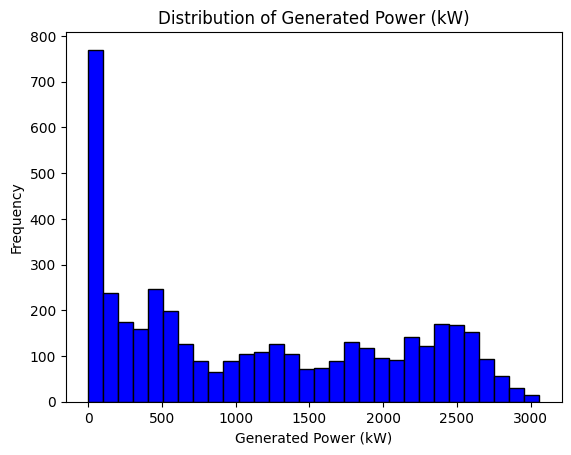

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('spg.csv')

# Plotting the histogram
plt.hist(data['generated_power_kw'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


In [8]:
pip install matplotlib seaborn

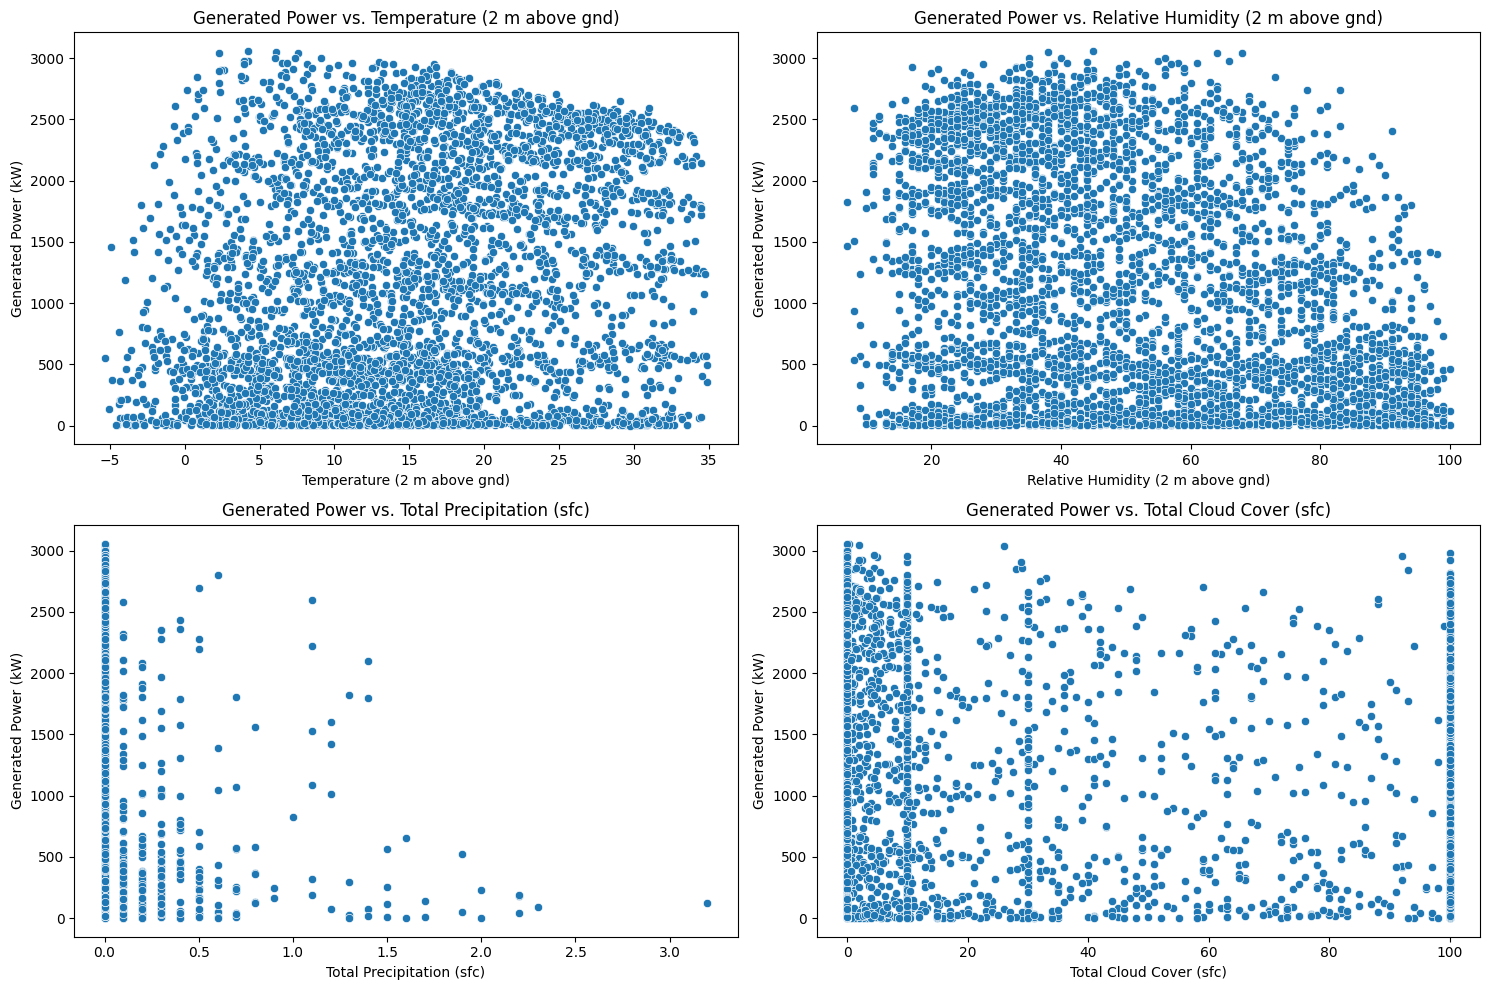

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('spg.csv')

# Define the variables for plotting
variables = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
             'total_precipitation_sfc', 'total_cloud_cover_sfc']
titles = ['Temperature (2 m above gnd)', 'Relative Humidity (2 m above gnd)',
          'Total Precipitation (sfc)', 'Total Cloud Cover (sfc)']

# Creating scatter plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=var, y='generated_power_kw')
    plt.title(f'Generated Power vs. {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

ok this is a good analysis...temperature and hunmidity dont seem to have much impact...but total cloud cover and huidity do seem to have an impact

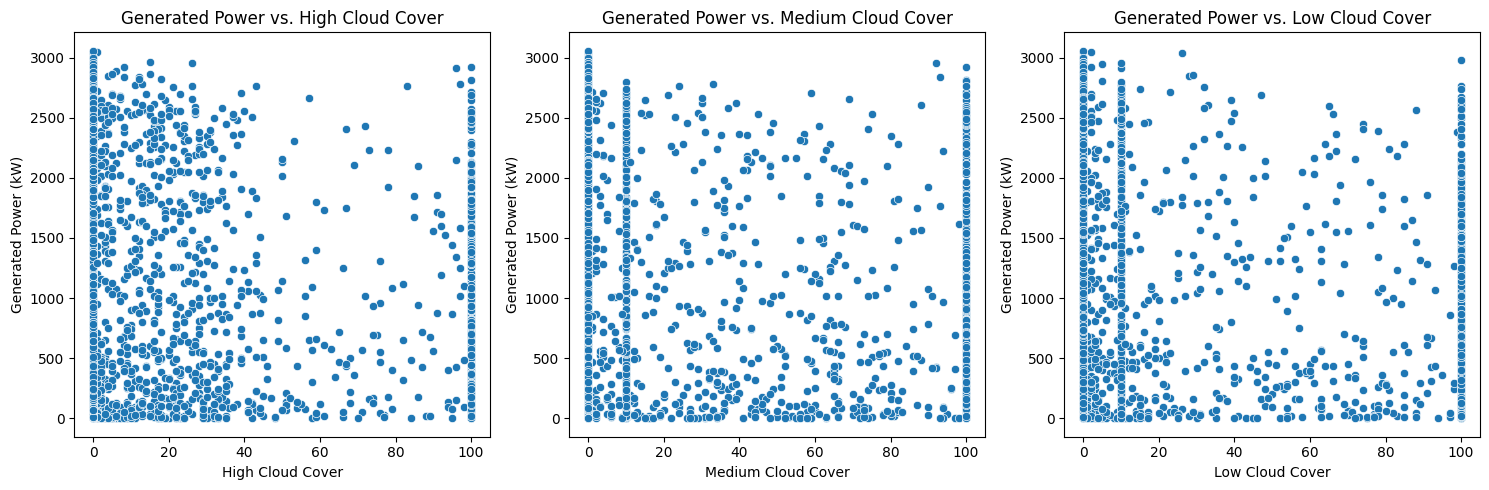

In [11]:
# Define the variables for plotting
variables = ['high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay']
titles = ['High Cloud Cover', 'Medium Cloud Cover', 'Low Cloud Cover']

# Creating scatter plots
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=data, x=var, y='generated_power_kw')
    plt.title(f'Generated Power vs. {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

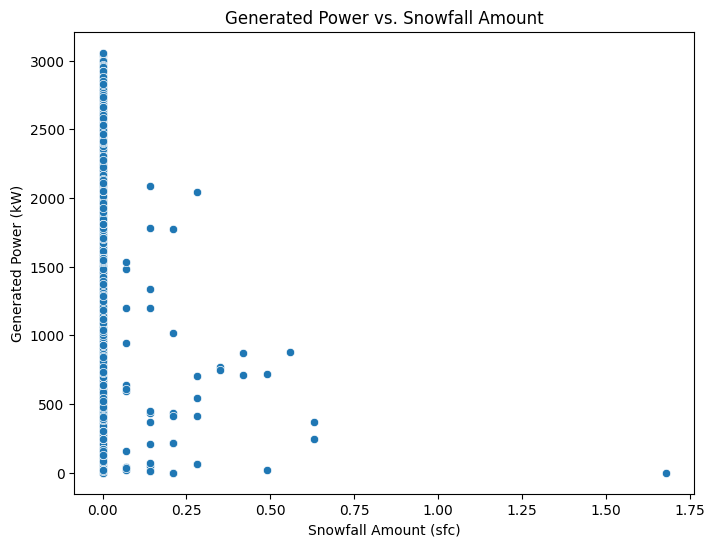

In [40]:
plt.figure(figsize=(8, 6))
original_data = sns.scatterplot(data=data, x='snowfall_amount_sfc', y='generated_power_kw')
plt.title('Generated Power vs. Snowfall Amount')
plt.xlabel('Snowfall Amount (sfc)')
plt.ylabel('Generated Power (kW)')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('spg.csv')

# Prepare the data
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred < 0, 0, y_pred)  # Replace negative values with 0

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 242336.83164230004


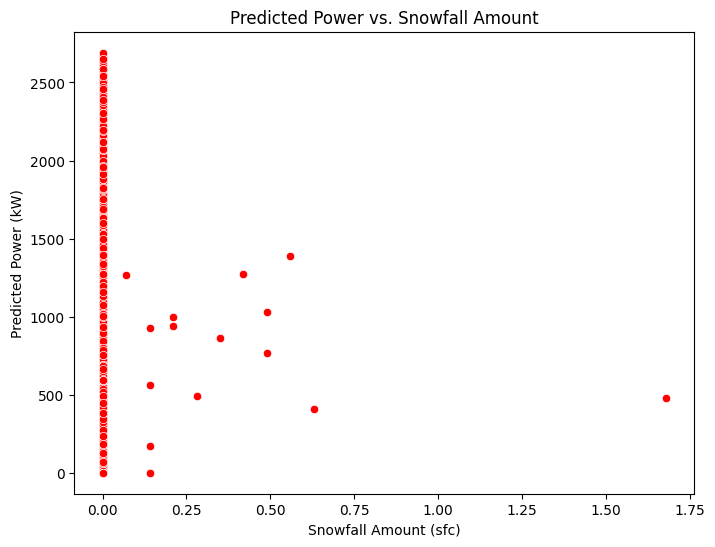

In [34]:
# Add predictions to the test set for plotting
X_test['predicted_power'] = y_pred

# Plot
plt.figure(figsize=(8, 6))
machine_data = sns.scatterplot(data=X_test, x='snowfall_amount_sfc', y='predicted_power',color='red')
plt.title('Predicted Power vs. Snowfall Amount')
plt.xlabel('Snowfall Amount (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

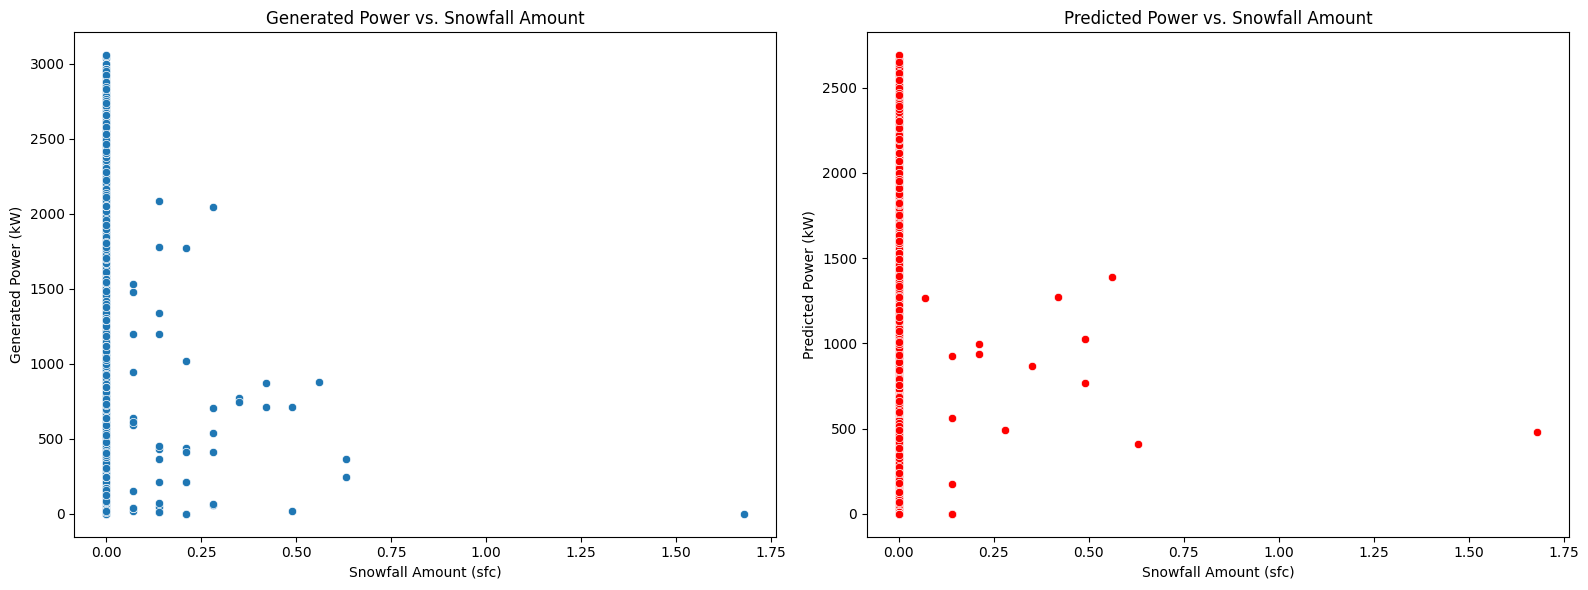

In [41]:
# Assuming 'data' and 'X_test' are your DataFrames
# and 'y_pred' contains your model's predictions

# Add predictions to the test set for plotting, if not already added
X_test['predicted_power'] = y_pred

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original data in the first subplot
sns.scatterplot(ax=axs[0], data=data, x='snowfall_amount_sfc', y='generated_power_kw')
axs[0].set_title('Generated Power vs. Snowfall Amount')
axs[0].set_xlabel('Snowfall Amount (sfc)')
axs[0].set_ylabel('Generated Power (kW)')

# Plot the machine learning predictions in the second subplot
sns.scatterplot(ax=axs[1], data=X_test, x='snowfall_amount_sfc', y='predicted_power', color='red')
axs[1].set_title('Predicted Power vs. Snowfall Amount')
axs[1].set_xlabel('Snowfall Amount (sfc)')
axs[1].set_ylabel('Predicted Power (kW)')

# Display the plots
plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 366.97594995954586
Mean Squared Error: 242336.83164230004
Root Mean Squared Error: 492.27718984561943
R-squared Score: 0.7347055893985727


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('spg.csv')

# Prepare the data
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_gb = np.where(y_pred_gb < 0, 0, y_pred_gb)  # Replace negative values with 0

# Calculate the mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error with Gradient Boosting: {mse_gb}")

Mean Squared Error with Gradient Boosting: 180124.45727249997


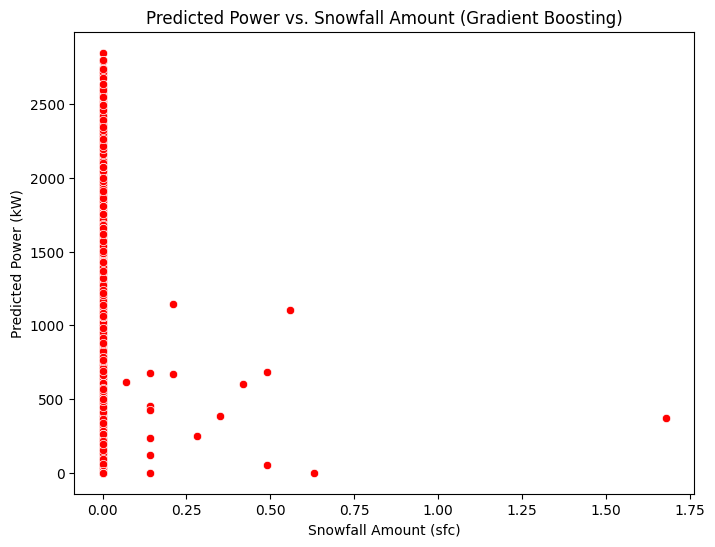

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the predictions to the test set for plotting
X_test['predicted_power_gb'] = y_pred_gb

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test, x='snowfall_amount_sfc', y='predicted_power_gb', color='red')
plt.title('Predicted Power vs. Snowfall Amount (Gradient Boosting)')
plt.xlabel('Snowfall Amount (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

In [48]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_gb)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred_gb)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 283.60329187544613
Mean Squared Error: 180124.45727249997
Root Mean Squared Error: 424.4107176692172
R-squared Score: 0.8028116015086632
